# What is Data Science?

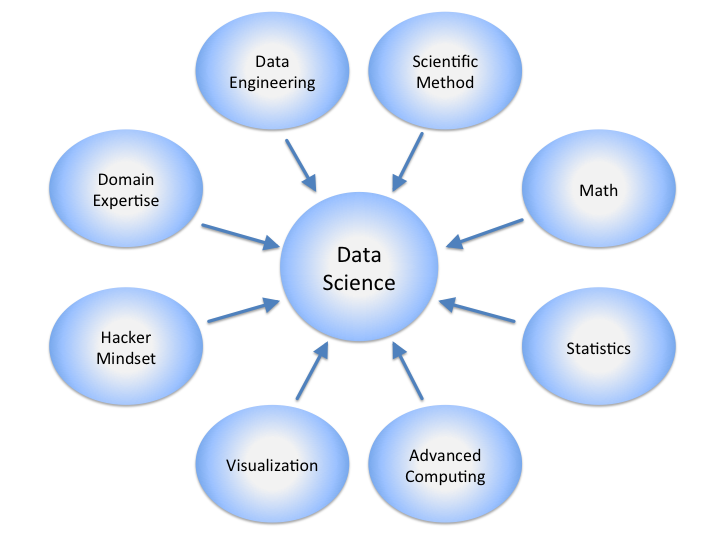

In [184]:
Image(filename='/Users/Lucien/Desktop/whatisdatascience.png')

## Yes but what does a Data Scientist DO?

### Steps to successful Data Science:
1. ETL (Extract Transform Load)
2. Clean the data
3. Explore the data
    * Visualization, "Storytelling"
4. Analyze and **Model** the data
    * (*Machine Learning*), Prediction, Control, Decision Making, Validation
5. (Put into Production)

### What is Machine Learning?

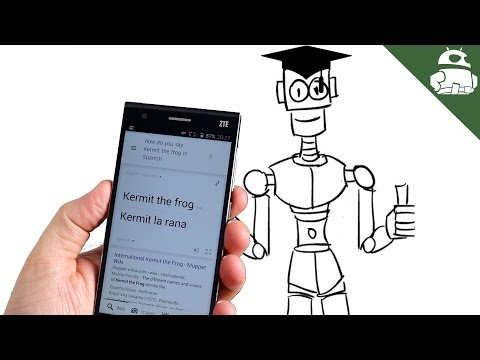

In [195]:
YouTubeVideo("WXHM_i-fgGo")

## Examples of Machine Learning Algorithms

### Unsupervised - Learning from **unlabeled** data
* K-means
* Principal Components Analysis
* Singular Value Decomposition
* Anomaly Detection

### Supervised - Learning from **labeled** data
* Linear Regression
* Logistic Regression
* Neural Nets
* K-NN
* SVM
* Random Forests / Decision Tree
 
### Semi-supervised - Learning from both **labeled and unlabeled** data
* Reinforcement Learning
* ...

### Examples
 Spam Detection, Image recognition, pattern recognition, “similar product” suggestions, User Clustering, Sentiment analysis

### How can this apply to Brook?
**Common Data Science Tasks**
* User Clustering
* Visualization 
* Churn 
* A/B Testing
* Natural Language Processing
    * Sentiment Analysis
    * Topic Modeling
    * Named Entity Recognition
    * Parts of speech tagging
    * Ontology generation
    * Generative text models

**Others**
* Prediction of all kinds
* Spam detection
* Sentiment analysis
* Question-answering

In [191]:
import sklearn
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from pprint import pprint
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image, YouTubeVideo

200 200


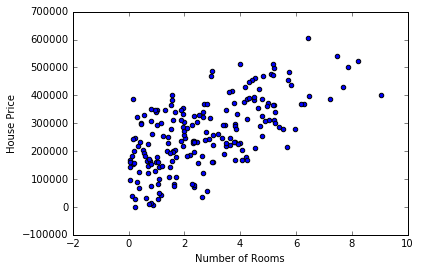

In [112]:
house_prices = np.random.normal(250000, 100000, 200)
house_prices = np.absolute(house_prices)
house_bedrooms = np.random.normal(2, 2, 200)
house_bedrooms = np.rint(house_bedrooms)
house_bedrooms = np.absolute(house_bedrooms)

house_prices = np.sort(house_prices)
house_bedrooms = np.sort(house_bedrooms)

house_prices = rand_jitter(house_prices)
house_bedrooms = rand_jitter(house_bedrooms)

def rand_jitter(arr):
    stdev = .15*(max(arr)-min(arr))
    return np.absolute(arr + np.random.randn(len(arr)) * stdev)

plt.xlabel("Number of Rooms")
plt.ylabel("House Price")
plt.scatter(house_bedrooms, house_prices)


In [128]:
house_bedrooms = house_bedrooms.reshape(200, 1)
house_prices = house_prices.reshape(200, 1)


## The important bit
regression = sklearn.linear_model.LinearRegression()
regression.fit(house_bedrooms, house_prices)


#The coefficients
print 'Coefficients: \n', regression.coef_


Coefficients: 
[[ 40258.46661622]]


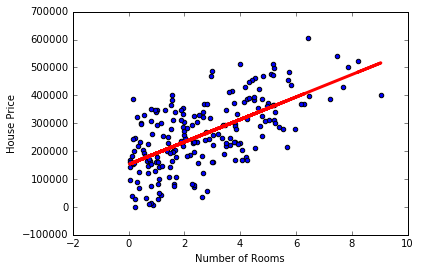

In [134]:
plt.xlabel("Number of Rooms")
plt.ylabel("House Price")
plt.scatter(house_bedrooms, house_prices)
plt.plot(house_bedrooms, regression.predict(house_bedrooms), color="red", linewidth=3)

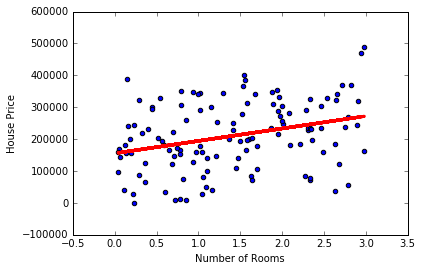

In [181]:
df_ofit = []
for i in range(len(house_prices)):
    df_ofit.append({"price": house_prices[i][0], "rooms": house_bedrooms[i][0]})

df_ofit = pd.DataFrame(df_ofit)



#"house_prices":house_prices.reshape(1, -1).tolist(), index=[0])
df_ofit_low = df_ofit[df_ofit['rooms'] < 3]
df_ofit_high = df_ofit[df_ofit['rooms'] >= 3]

regression = sklearn.linear_model.LinearRegression()
regression.fit(df_ofit_low['rooms'].reshape(len(df_ofit_low), -1),
               df_ofit_low['price'].reshape(len(df_ofit_low), -1))



rooms = df_ofit_low['rooms'].reshape(len(df_ofit_low), -1)
price = df_ofit_low['price'].reshape(len(df_ofit_low), -1)
plt.xlabel("Number of Rooms")
plt.ylabel("House Price")
plt.scatter(rooms, price)
plt.plot(rooms, regression.predict(rooms), color="red", linewidth=3)

In [192]:
iris = datasets.load_iris()
iris_targets = iris['target']
iris_data = iris['data']
iris_names = iris['target_names']
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [194]:
iris_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [30]:
df = pd.DataFrame(iris_data)
df.columns = iris_columns
df['species'] = iris_targets

In [38]:
df = sklearn.utils.shuffle(df)

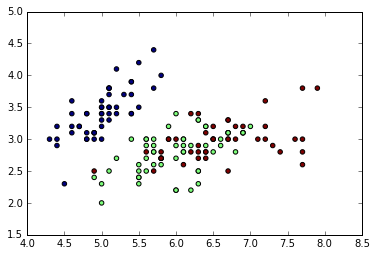

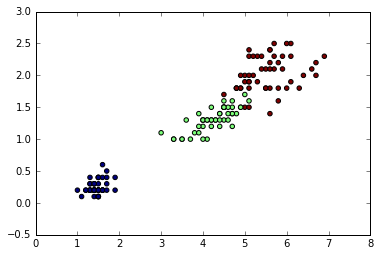

In [62]:
plt.figure(1)

plt.figure(2)
plt.scatter(df['petal_length'], df['petal_width'], c=df['species'])
plt.show()

In [58]:
no_answers = df[['petal_length', 'petal_width',
                 'sepal_length', 'sepal_width']]
kmeans = KMeans(n_clusters=3,
                random_state=0).fit(no_answers)

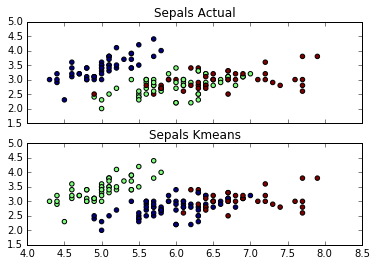

In [83]:
fig, axarr = plt.subplots(2, sharex=True)
axarr[1].scatter(df['sepal_length'], df['sepal_width'], c=kmeans.labels_)
axarr[0].scatter(df['sepal_length'], df['sepal_width'], c=df['species'])
axarr[1].set_title("Sepals Kmeans")
axarr[0].set_title("Sepals Actual")
plt.show()

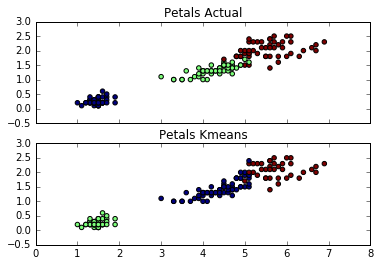

In [84]:
import matplotlib.patches as mpatches

fig, axarr = plt.subplots(2, sharex=True)
axarr[1].scatter(df['petal_length'], df['petal_width'], c=kmeans.labels_)
axarr[0].scatter(df['petal_length'], df['petal_width'], c=df['species'])
axarr[1].set_title("Petals Kmeans")
axarr[0].set_title("Petals Actual")

plt.show()